## Librerías

In [155]:
import random
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call

from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools


from sklearn.neighbors import NearestNeighbors

In [115]:
random.seed(10)

## Datos

In [116]:
datos = pd.read_excel("Datos Finales/EnjoyersV2.xlsx").drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [117]:
# Comenarios vacíos
datos["Comentario traducido"].fillna(".",inplace=True)
sentiment = SentimentIntensityAnalyzer()
datos["sentimiento"] = [sentiment.polarity_scores(datos["Comentario traducido"][i])["compound"] for i in range(10493)]
datos.head()

,Año,Mes,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,...,Comentario para OSF,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF,Comentario traducido,sentimiento
0,2021,4,100,207,4,5,4,5,4,5,...,Me gustó mucho la causa a la que se estaba apo...,4,5,5,5,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,It is difficult to get collaborations in these...,0.4767
1,2021,4,100,168,4,4,4,4,2,4,...,"Me gustó el servicio, pero me hubiera gustado ...",4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.","Well, I hope that now my hours are worth it, n...",0.3979
2,2021,4,100,349,4,5,5,5,5,5,...,Muchas gracias por el apoyo y la oportunidad d...,5,5,5,5,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",The only thing I disliked about the service wa...,-0.6249
3,2021,4,100,245,5,5,5,3,3,5,...,¡Muchas gracias por la experiencia!,5,5,5,5,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,...",I really liked the experience because of the o...,0.6697
4,2021,4,100,151,4,3,3,3,4,5,...,Muchas gracias por todo.,4,4,4,4,"No sentí que mi trabajo tuviera impacto, fue m...",Área de oportunidad,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.,"I did not feel that my work had an impact, it ...",0.0000


## PCA

In [118]:
d = datos.drop(columns=["Año", "Mes", "Duración", "Progreso", "P1.1", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"])

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(d)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
d.head()

,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P2,P3,P5.1,P5.2,P5.3,P5.4,sentimiento
0,5,4,5,4,5,5,5,1,1,4,5,5,5,0.4767
1,4,4,4,2,4,4,1,1,1,4,4,4,4,0.3979
2,5,5,5,5,5,5,4,1,1,5,5,5,5,-0.6249
3,5,5,3,3,5,5,5,1,1,5,5,5,5,0.6697
4,3,3,3,4,5,5,2,1,1,4,4,4,4,0.0000


In [119]:
PCA = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = d.columns,
    index   = ["C"+str(i) for i in range(1, 15)]
    )

PCA



,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P2,P3,P5.1,P5.2,P5.3,P5.4,sentimiento
C1,-0.318862,-0.305922,-0.300902,-0.249546,-0.317783,-0.311782,-0.287818,-0.150721,-0.142043,-0.266898,-0.294954,-0.277170,-0.287307,-0.101965
C2,0.086940,0.123477,0.175973,0.152444,0.269990,0.290943,0.247205,0.300257,-0.147538,-0.372916,-0.378669,-0.413088,-0.371252,0.038576
C3,0.045727,0.069058,0.063869,0.144574,0.030506,0.036949,0.113545,-0.244211,-0.467937,0.059768,0.038509,0.027997,0.023124,-0.817308
C4,0.057924,0.080229,0.068389,0.161221,-0.003655,-0.027966,0.040199,-0.526894,-0.609358,-0.003937,0.011990,0.010928,-0.005694,0.554871
C5,-0.102299,-0.062277,-0.108810,-0.233238,-0.028182,0.014393,-0.091569,0.683868,-0.604248,0.129018,0.110142,0.136458,0.146719,0.091194
C6,0.123372,0.199326,0.257898,-0.818203,0.244797,0.210872,-0.197260,-0.218917,-0.019790,-0.123109,0.021217,0.007855,0.013309,-0.040184
C7,0.310683,0.527156,0.270276,0.180755,-0.242291,-0.354356,-0.539017,0.159600,-0.012237,0.007862,-0.083968,-0.092491,-0.051290,-0.033611
C8,0.113183,0.241354,-0.337217,0.025464,-0.073813,-0.067272,0.123057,0.016981,-0.002115,-0.775141,0.166023,0.174659,0.360327,-0.020370
C9,-0.346691,-0.332186,0.471309,0.273128,0.185711,0.152619,-0.446776,0.008814,-0.006986,-0.340586,0.040324,0.303213,0.072500,-0.019761
C10,-0.134488,-0.016960,0.559408,-0.183868,-0.386213,-0.358850,0.526000,0.076421,0.005843,-0.129229,0.045221,0.195134,-0.131812,0.014125


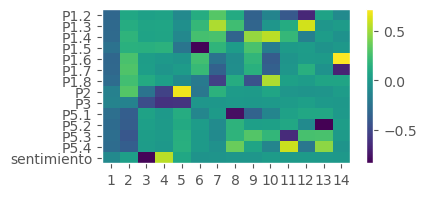

In [120]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(d.columns)), d.columns)
plt.xticks(range(len(d.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.48786111 0.09911516 0.06932478 0.06264518 0.05730401 0.04283764
 0.0330456  0.02863943 0.02631474 0.02288485 0.02079398 0.02010835
 0.0178413  0.01128389]


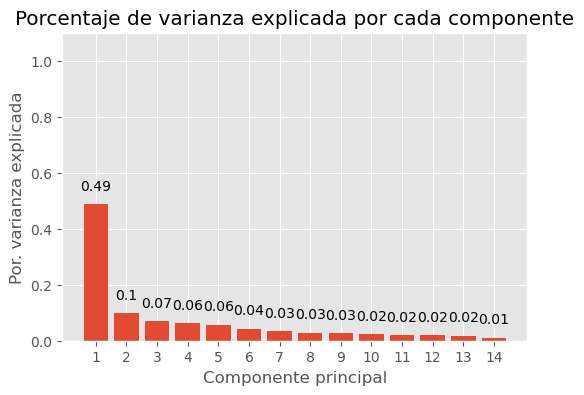

In [121]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.48786111 0.58697627 0.65630104 0.71894622 0.77625023 0.81908787
 0.85213346 0.88077289 0.90708763 0.92997249 0.95076647 0.97087481
 0.98871611 1.        ]


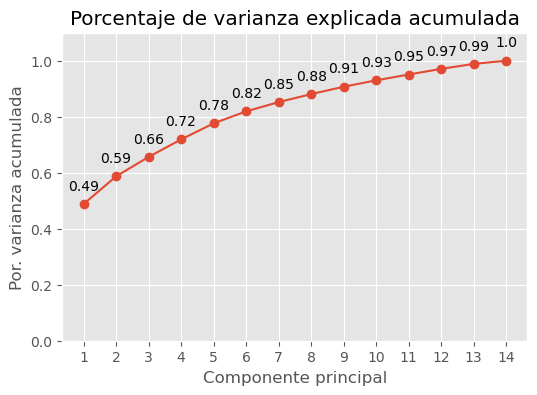

In [122]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(d.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(d.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [123]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=d)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ["C"+str(i) for i in range(1, 15)],
    index   = d.index
)
proyecciones.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,-0.906479,0.376938,-0.187717,-0.253969,0.240337,0.513511,-0.882613,0.667087,0.664586,0.419218,-0.231328,-0.979565,-0.060218,-0.024387
1,4.063647,-0.104942,-1.233772,-1.066541,0.763143,2.097810,1.631780,-0.771957,1.036003,-1.497963,-0.130944,-0.103511,-0.140698,-0.219659
2,-1.322820,-0.233283,2.498949,-1.714382,-0.077654,0.106925,0.796574,-0.159435,0.598635,-0.652249,-0.072242,-0.021387,-0.068733,-0.066559
3,-0.781456,-0.545035,-0.748378,-0.186535,0.893622,0.841249,-0.995372,0.668283,-1.710996,-0.926734,-0.483559,0.370701,0.035040,0.126441
4,3.812427,0.618516,-0.053582,-1.601136,0.407754,-0.053017,-0.791388,-0.809007,1.896714,-2.602247,0.048224,0.446993,-0.247565,0.078203


In [124]:
proyecciones = np.dot(modelo_pca.components_, scale(d).T)
proyecciones = pd.DataFrame(proyecciones, index = ["C"+str(i) for i in range(1, 15)])
proyecciones = proyecciones.transpose().set_index(d.index)
proyecciones.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,-0.906479,0.376938,-0.187717,-0.253969,0.240337,0.513511,-0.882613,0.667087,0.664586,0.419218,-0.231328,-0.979565,-0.060218,-0.024387
1,4.063647,-0.104942,-1.233772,-1.066541,0.763143,2.097810,1.631780,-0.771957,1.036003,-1.497963,-0.130944,-0.103511,-0.140698,-0.219659
2,-1.322820,-0.233283,2.498949,-1.714382,-0.077654,0.106925,0.796574,-0.159435,0.598635,-0.652249,-0.072242,-0.021387,-0.068733,-0.066559
3,-0.781456,-0.545035,-0.748378,-0.186535,0.893622,0.841249,-0.995372,0.668283,-1.710996,-0.926734,-0.483559,0.370701,0.035040,0.126441
4,3.812427,0.618516,-0.053582,-1.601136,0.407754,-0.053017,-0.791388,-0.809007,1.896714,-2.602247,0.048224,0.446993,-0.247565,0.078203


In [125]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = d.columns,
                    index   = d.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(d.head())

------------------
Valores originales
------------------


,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P2,P3,P5.1,P5.2,P5.3,P5.4,sentimiento
0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,1.0,1.0,4.0,5.0,5.0,5.0,4.767000e-01
1,4.0,4.0,4.0,2.0,4.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,3.979000e-01
2,5.0,5.0,5.0,5.0,5.0,5.0,4.0,1.0,1.0,5.0,5.0,5.0,5.0,-6.249000e-01
3,5.0,5.0,3.0,3.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,5.0,6.697000e-01
4,3.0,3.0,3.0,4.0,5.0,5.0,2.0,1.0,1.0,4.0,4.0,4.0,4.0,-4.440892e-16


---------------------
Valores reconstruidos
---------------------


,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P2,P3,P5.1,P5.2,P5.3,P5.4,sentimiento
0,5,4,5,4,5,5,5,1,1,4,5,5,5,0.4767
1,4,4,4,2,4,4,1,1,1,4,4,4,4,0.3979
2,5,5,5,5,5,5,4,1,1,5,5,5,5,-0.6249
3,5,5,3,3,5,5,5,1,1,5,5,5,5,0.6697
4,3,3,3,4,5,5,2,1,1,4,4,4,4,0.0000


# Modelos supervisados

## Regresión lineal
Columna objetivo: P1.1

In [126]:
X = datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]]
Y = datos["P1.1"]

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [128]:
# Create an instance of the Linear Regression model
reg = LinearRegression()

# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)

LinearRegression()

In [129]:
predictions = reg.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to 1 the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.385049439583021
Determination Coeficient 0.725740260457236


In [130]:
print(f"Accuracy on test set: {round(reg.score(X_test,Y_test),2)}")

Accuracy on test set: 0.73


In [131]:
import statsmodels.api as sm
import pandas as pd



# Agregar una constante a la matriz de variables independientes
X = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal
model = sm.OLS(Y_train, X).fit()

# Obtener los coeficientes de regresión
coefficients = model.params

# Imprimir los coeficientes y su significancia estadística
pesos = {}
for i, variable in enumerate(X.columns):
    pesos[variable] = model.pvalues[i]
    #print(f'Variable: {variable}, Coeficiente: {coefficients[i]}, P-valor: {model.pvalues[i]}')


pesos_df = pd.DataFrame(pesos, index=[0]).transpose().rename(columns={0:"Peso"}).sort_values("Peso", ascending=False)
pesos_df

,Peso
P2,9.681780e-01
P5.1,7.983216e-01
P5.4,5.740651e-01
P5.3,5.171782e-01
P5.2,3.279804e-01
P3,2.676261e-01
P1.5,7.389383e-04
const,3.188803e-05
P1.7,1.541331e-20
P1.4,2.486863e-31


## Árboles de decisión
Columna objetivo: P1.1

In [132]:
# Búsqueda del mejor árbol de decisión

cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(datos))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(datos):
        f_train = datos.loc[train_fold] 
        f_valid = datos.loc[valid_fold] 

        model = tree_model.fit(X = f_train[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]], 
                               y = f_train["P1.1"]) 
        valid_acc = model.score(X = f_valid[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]], 
                                y = f_valid["P1.1"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

print("Max Depth Elegido: ",df["Max Depth"][df["Average Accuracy"] == df["Average Accuracy"].max()].values)


 Max Depth  Average Accuracy
         1          0.805598
         2          0.818368
         3          0.822942
         4          0.824371
         5          0.829421
         6          0.827993
         7          0.825801
         8          0.824562
         9          0.823798
        10          0.822178
        11          0.819224
        12          0.820939
        13          0.821988
        14          0.822369
        15          0.820844
        16          0.822273
        17          0.822273
        18          0.822845
        19          0.822464
        20          0.822083
        21          0.822274
        22          0.822083
        23          0.822178
        24          0.822941
Max Depth Elegido:  [5]


In [133]:
# Creación del árbol de decisión
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y = datos['P1.1'].values 
x = datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]].values 


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)


# Crear Arbol de decision con profundidad = 6
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 6,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]]),
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
import subprocess
from PIL import Image

# ...

# Convertir el archivo .dot a .png
subprocess.run(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'], check=True)

# Mostrar la imagen
image = Image.open('tree1.png')
image.show()



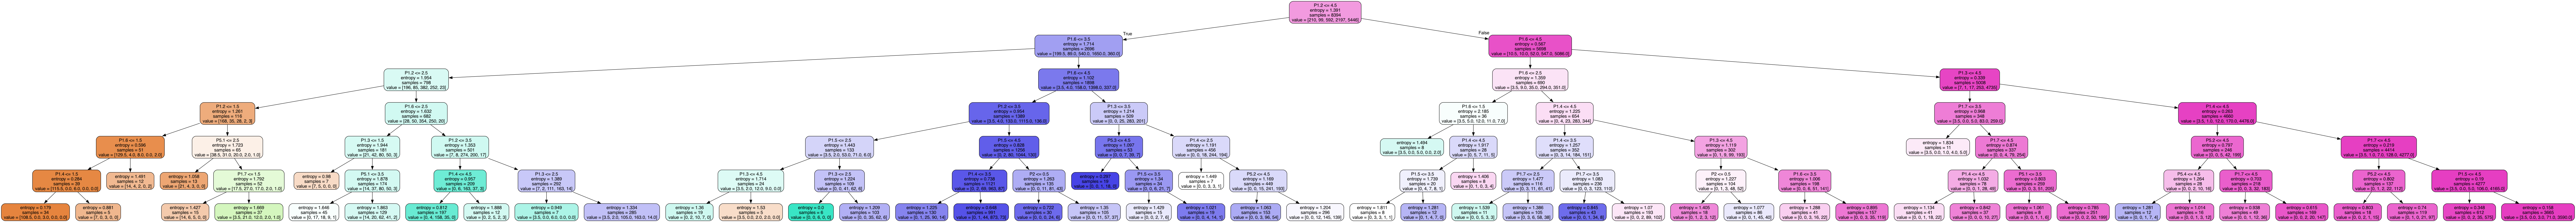

In [134]:
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [135]:
# Precisión
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Accuracy:",acc_decision_tree)
y_pred = decision_tree.predict(x_test)

Accuracy: 83.89


In [136]:
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        21
           2       0.50      0.20      0.29        20
           3       0.55      0.51      0.53       120
           4       0.75      0.75      0.75       600
           5       0.91      0.92      0.92      1338

    accuracy                           0.84      2099
   macro avg       0.67      0.60      0.62      2099
weighted avg       0.84      0.84      0.84      2099



In [137]:
C = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])
print("Matriz de confusión\n")
display(C)
display(C / C.astype(np.float).sum(axis=0))

Matriz de confusión



,1,2,3,4,5
1,13,2,5,1,0
2,2,4,12,2,0
3,5,2,61,48,4
4,1,0,29,451,119
5,0,0,4,97,1237


,1,2,3,4,5
1,0.619048,0.25,0.045045,0.001669,0.000000
2,0.095238,0.50,0.108108,0.003339,0.000000
3,0.238095,0.25,0.549550,0.080134,0.002941
4,0.047619,0.00,0.261261,0.752922,0.087500
5,0.000000,0.00,0.036036,0.161937,0.909559


## SVM
Columna objetivo: Tipo de comentario

In [139]:
n = len(datos)



In [140]:
datos['Tipo comentario'].replace({'Reconocimiento':1, 'Área de oportunidad':0}, inplace=True)
datos2 = datos.groupby('OSF')['Tipo comentario'].mean()
dic_promedio_tc = {}
lista_OSF = datos2.index
contador=0
for u in lista_OSF:
    dic_promedio_tc[u] = datos2[contador]
    contador+=1

datos['Comentario traducido'].fillna(' ', inplace=True)
sentiment = SentimentIntensityAnalyzer()
datos["sentimiento"] = [sentiment.polarity_scores(datos["Comentario traducido"][i])["compound"] for i in range(n)]

In [141]:
# Aqui estamos iterando entre las filas del dataset para ver si contiene valores nulos y llenarlos con la media del tipo de comentario

for u in range(n):
    if(pd.isna(datos['Tipo comentario'][u])==True):
        Org = datos['OSF'][u]
        if(dic_promedio_tc[Org] >=0):
            datos['Tipo comentario'][u] = round(dic_promedio_tc[Org])
            # Nos fijamos en la satisfacción del usuario para llenar el tipo de comentario si estaba vacío la media
        elif(pd.isna(dic_promedio_tc[Org]) == True and datos['P1.1'][u] >= 4):
            datos['Tipo comentario'][u] = 1.0

In [142]:
# Hacemos el modelo:
X = datos[["P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P2", "P3", "P5.1", "P5.2", "P5.3", "P5.4"]]
y =datos['Tipo comentario']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=73)
svc_modelo = SVC()
svc_modelo.fit(X_train, y_train)
y_pred = svc_modelo.predict(X_test)

In [143]:
# Calculamos la precision
precision = accuracy_score(y_test, y_pred)
print("Accuracy:", precision)

# Generamos un reporte
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7894235350166746
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.21      0.32       484
         1.0       0.80      0.96      0.88      1615

    accuracy                           0.79      2099
   macro avg       0.71      0.59      0.60      2099
weighted avg       0.76      0.79      0.75      2099



# Modelos no supervisados

## DBSCAN

In [145]:
epsilons = np.linspace(0.01, 1, num=15)
min_samples = np.arange(2,20,step=3)
combinations = list(itertools.product(epsilons,min_samples))
N = len(combinations)
X = datos[['sentimiento']].values

In [146]:
# Función que busca los paramétros más adecuados para hacer el modelo
def get_scores_and_labels(combinations, X):
    scores= []
    all_labels_list= []
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model=DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if(-1 in labels_set):
            num_clusters -=1
        if(num_clusters < 2 or num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps,num_samples)
            print(f'Combination{c} on iteration {i+1} of {N} has {num_clusters}. Moving on')
            continue
            
        scores.append(ss(X, labels))
        all_labels_list.append(labels)

        print(f'Index:{i}, Score:{scores[-1]}, Labels:{all_labels_list[-1]}, Num_clusters:{num_clusters}')

        best_index=np.argmax(scores)
        best_parameters= combinations[best_index]
        best_labels =all_labels_list[best_index]
        best_score = scores[best_index]

        return {'best_epsilon':best_parameters[0],
                'best_min_samples':best_parameters[1],
                'best_labels': best_labels,
                'best_score': best_score}

best_dict = get_scores_and_labels(combinations=combinations, X=X)

Index:0, Score:0.6497705871569414, Labels:[0 0 1 ... 0 0 2], Num_clusters:22


In [187]:
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X)

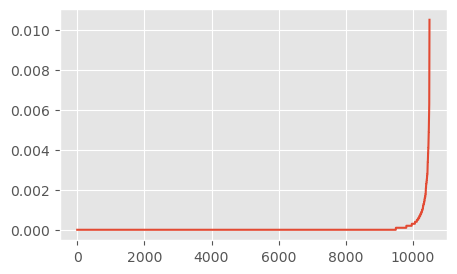

In [188]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot